In [1]:
import torch
from torch import nn

In [2]:
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [3]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

X, Y = digits.data, digits.target
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [5]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    
    result = net(X)
    loss = loss_fn(result, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

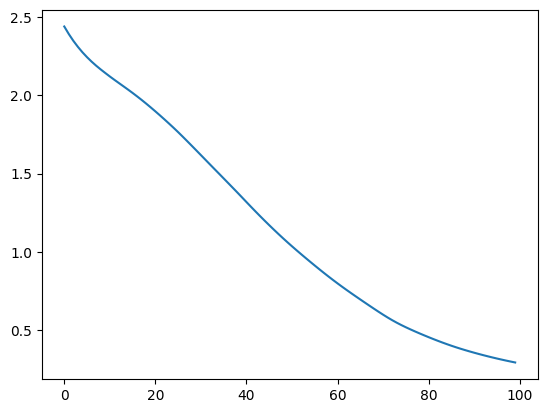

In [6]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X = X.to(device)
Y = Y.to(device)
net.to(device)
optimizer = optim.Adam(net.parameters())

In [8]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    
    result = net(X)
    loss = loss_fn(result, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

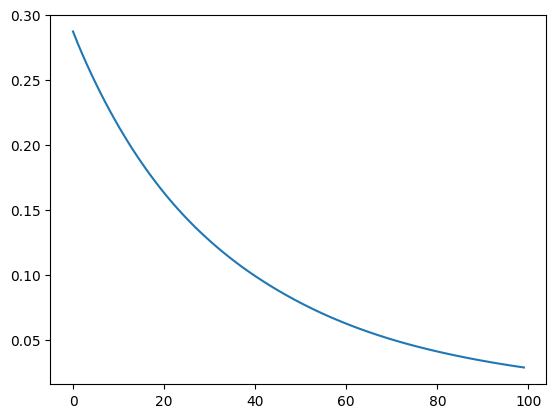

In [9]:
plt.plot(losses)

### <b style="color: #234af8">Dataset, DataLoader</b>

In [10]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

In [11]:
X, Y = (d.to(device) for d in [X, Y])
ds = TensorDataset(X, Y)
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)
loss_fn = nn.CrossEntropyLoss()

net.to(device)
optimizer = optim.Adam(net.parameters())

In [12]:
from tqdm import tqdm

losses = []
for epoch in range(10):
    running_loss = 0.0
    
    bar = tqdm(loader)
    for ix, data in enumerate(bar):
        bar.set_postfix({'epoch': epoch+1})
        
        XX, YY = data
        optimizer.zero_grad()
        
        result = net(XX)
        loss = loss_fn(result, YY)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    losses.append(running_loss/(ix+1))

100%|██████████| 29/29 [00:00<00:00, 301.66it/s, epoch=10]


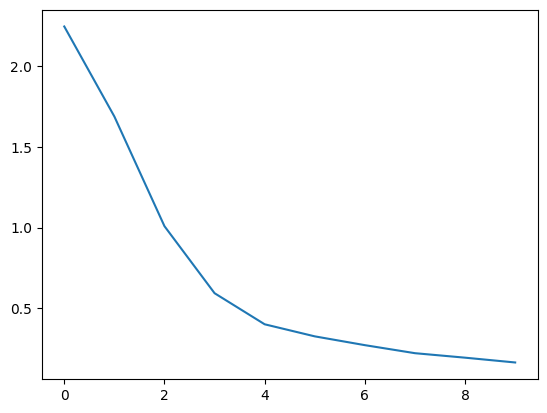

In [13]:
plt.plot(losses)

### <b style="color: #32a852">Dropout</b>

In [14]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [16]:
device = torch.device('cuda:0')
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test,  dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
Y_test  = torch.tensor(Y_test,  dtype=torch.int64)

In [17]:
k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, 10)
)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [18]:
train_losses, test_losses = [], []
for epoch in range(100):
    running_loss = 0.0
    for i, (xx, yy) in enumerate(loader):
        optimizer.zero_grad()
        result = net(xx)
        loss = loss_fn(result, yy)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / i)
    test_result = net(X_test)
    test_loss = loss_fn(test_result, Y_test)
    test_losses.append(test_loss.item())

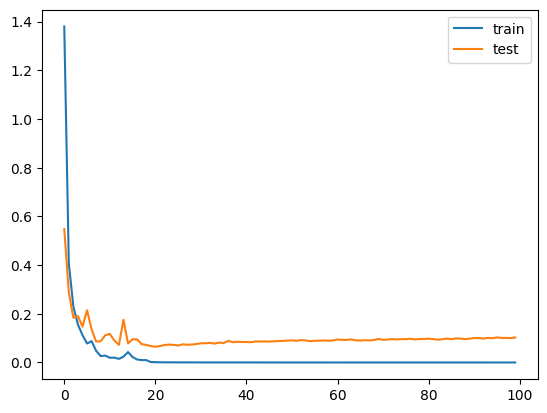

In [19]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

In [20]:
do_rate = .5
do_net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Dropout(do_rate),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(do_rate),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(do_rate),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(do_rate),
    nn.Linear(k, 10)
)
do_optimizer = optim.Adam(do_net.parameters())

In [21]:
do_train_losses, do_test_losses = [], []

for epoch in range(100):
    do_net.train()
    running_loss = 0.0
    for i, (xx, yy) in enumerate(loader):
        do_optimizer.zero_grad()
        result = do_net(xx)
        loss = loss_fn(result, yy)
        loss.backward()
        do_optimizer.step()
        running_loss += loss.item()
        
    do_train_losses.append(running_loss / i)
    do_net.eval()
    test_result = do_net(X_test)
    test_loss = loss_fn(test_result, Y_test)
    do_test_losses.append(test_loss.item())    

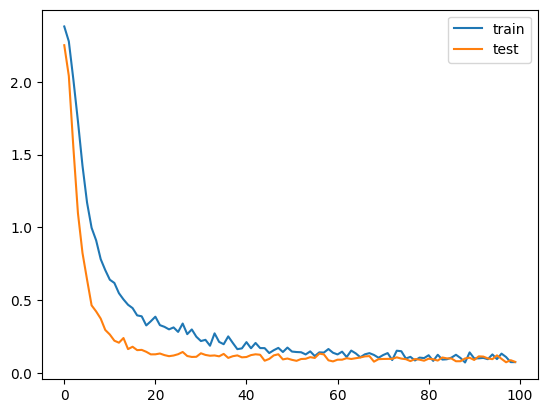

In [22]:
plt.plot(do_train_losses, label='train')
plt.plot(do_test_losses, label='test')
plt.legend()
plt.show()

### <b style="color: #0eab81">Batch Normalization</b>

In [23]:
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, 10)
)
optimizer = optim.Adam(net.parameters())

In [24]:
train_losses, test_losses = [], []
for epoch in range(100):
    net.train()
    running_loss = 0.0
    for i, (xx, yy) in enumerate(loader):
        optimizer.zero_grad()
        result = net(xx)
        loss = loss_fn(result, yy)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / i)
    net.eval()
    test_result = net(X_test)
    test_loss = loss_fn(test_result, Y_test)
    test_losses.append(test_loss.item())

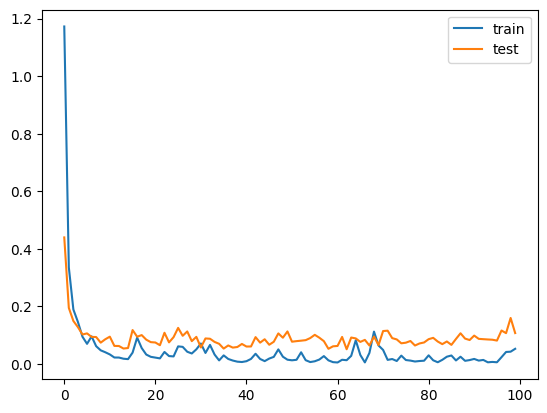

In [25]:
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

### <b style="color: #0eab81">신경망 모듈화</b>

In [26]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

In [27]:
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True, p=.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        return X
    
mlp = nn.Sequential(
    CustomLinear(64, 200),
    CustomLinear(200, 200),
    CustomLinear(200, 200),
    nn.Linear(200, 10)
)

In [36]:
class MyMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.ln1 = CustomLinear(in_features, 200)
        self.ln2 = CustomLinear(200, 200)
        self.ln3 = CustomLinear(200, 200)
        self.ln4 = CustomLinear(200, out_features)
        
    def forward(self, x):
        print('x type: ', type(x))
        # for ln in [self.ln1, self.ln2, self.ln3, self.ln4]:
        #     x = ln(x)
        x = self.ln1(x)
        x = self.ln2(x)
        x = self.ln3(x)
        x = self.ln4(x)
        return X
    
mlp = MyMLP(64, 10)
        
        

In [37]:
def train_and_check_loss(mlp):
    digits = load_digits()
    X = digits.data
    Y = digits.target
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, shuffle=True)
    
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    Y_train = torch.tensor(Y_train, dtype=torch.int64)
    Y_test = torch.tensor(Y_test, dtype=torch.int64)
    
    opt = optim.Adam(mlp.parameters())
    loss_fn = nn.CrossEntropyLoss()
    dataset = TensorDataset(X_train, Y_train)
    loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    train_losses, test_losses = [], []
    for epoch in range(100):
        mlp.train()
        running_loss = .0
        for i, (xx, yy) in enumerate(loader):
            print(type(xx))
            print(type(yy))
            opt.zero_grad()
            result = mlp(xx)
            loss = loss_fn(result, yy)
            loss.backward()
            opt.step()
            running_loss += loss.item()
        train_losses.append(running_loss/i)
        mlp.eval()
        test_result = mlp(X_train)
        test_loss = loss_fn(test_result, Y_test)
        test_losses.append(test_loss)
        
    plt.plot(train_losses, label='train')
    plt.plot(test_losses, label='test')
    plt.legend()
    plt.show()           
    

# **시발 왜 안되냐고!!**

In [39]:
train_and_check_loss(mlp)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
x type:  <class 'torch.Tensor'>


TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray